In [210]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

# Purpose

This notebook is meant to analyze VA data based on master.csv. 

# Reading in Data

In [211]:
master = pd.read_csv("Master/Master.csv")
df = master
master.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Choice_Increase_%,PC_Wait_Pending_Increase,PC_Wait_Pending_Increase_%,PC_Wait_Complete_Increase,PC_Wait_Complete_Increase_%,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,0.017927,5.31,2.115538,2.24,0.823529,0.0997,0.0955,0.1133,0.1474,0.0781
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,0.026059,2.17,0.553571,1.38,0.616071,0.0114,0.0842,0.0891,0.1402,0.0600
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,0.003997,-0.52,-0.464286,-0.45,-0.511364,0.0620,0.0859,0.0409,0.0814,0.0789
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,0.006944,12.80,7.710843,6.31,5.439655,0.0800,0.0781,0.0898,0.1011,0.0548
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,0.027697,3.09,1.161654,2.50,1.004016,0.0774,0.1134,0.1119,0.0909,0.1343


In [212]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412', u'MH_Pending_1412',
       u'ID', u'ORGANIZATION', u'MAY-FY11', u'MAY-FY12', u'MAY-FY13',
       u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'Appts_Pending_1610',
       u'%_Appts_Over_30_Pending_1610', u'PC_Wait_Pending_1610',
       u'SC_Wait_Pending_1610', u'MH_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Complete_1608', u'Station', u'Location',
       u'Choice_Hires', u'for_dups', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Complete_1409', u'PC_Wait_Complete_1409', u'SC_Wait_Complete_1409',
       u'Pending_Increase', u'Pending_Increase_%', u'Complete_Increase',
       u'Complete_Increase_%', u'Missing_Leadership', u'Choice_Increase_%',
       u'PC_Wait_Pending_Increase', u'PC_Wait_Pending_Increase_%',
       u'PC_

# Look at Pending Versus Complete

count       141.000000
mean      11503.765957
std       16722.668013
min       -5744.000000
25%        2798.000000
50%        7151.000000
75%       14007.000000
max      110496.000000
Name: Pending_Increase, dtype: float64
R-squared: 0.883852582905


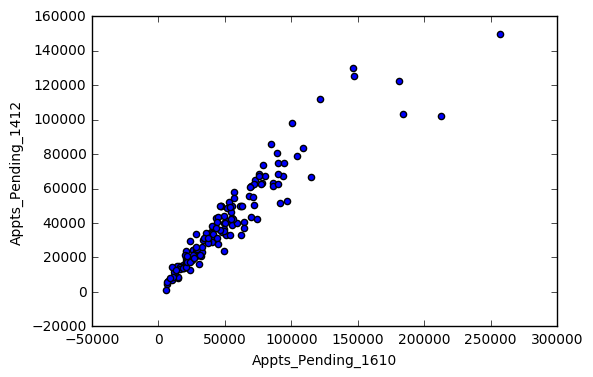

In [214]:
ax = df.plot(kind ='scatter',x='Appts_Pending_1610',y='Appts_Pending_1412')


print df["Pending_Increase"].describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Pending_1412"])
print "R-squared: "+ str(r_value**2)

count      140.000000
mean      2476.564286
std       3042.725816
min      -3430.000000
25%               NaN
50%               NaN
75%               NaN
max      17594.000000
Name: Complete_Increase, dtype: float64
R-squared: nan


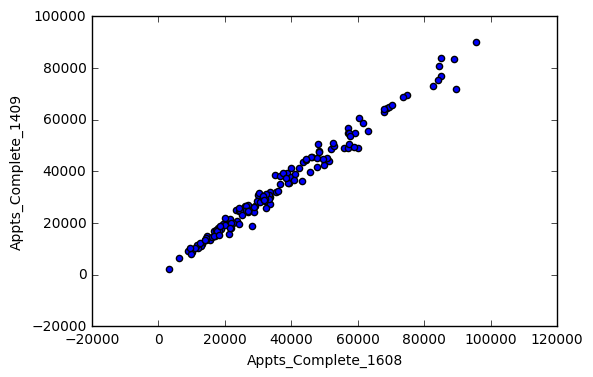

In [216]:
ax = df.plot(kind ='scatter',x='Appts_Complete_1608',y='Appts_Complete_1409')
print df["Complete_Increase"].describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Complete_1608"],df["Appts_Complete_1409"])
print "R-squared: "+ str(r_value**2)

### Thoughts
While there was an increase in both pending and completed appointments from 2014 to 2016, the pending saw a significantly bigger increase. 

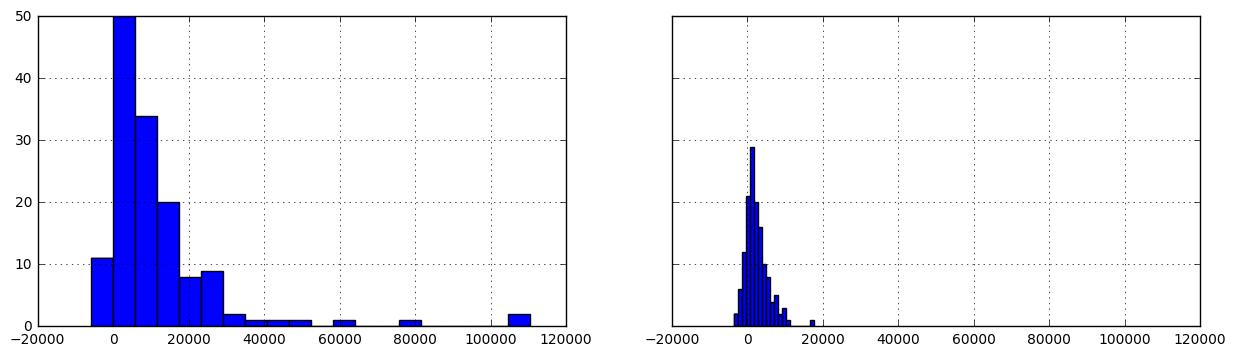

In [217]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,4))
df["Pending_Increase"].hist(bins=20, ax=ax1)
df["Complete_Increase"].hist(bins=20,ax=ax2)

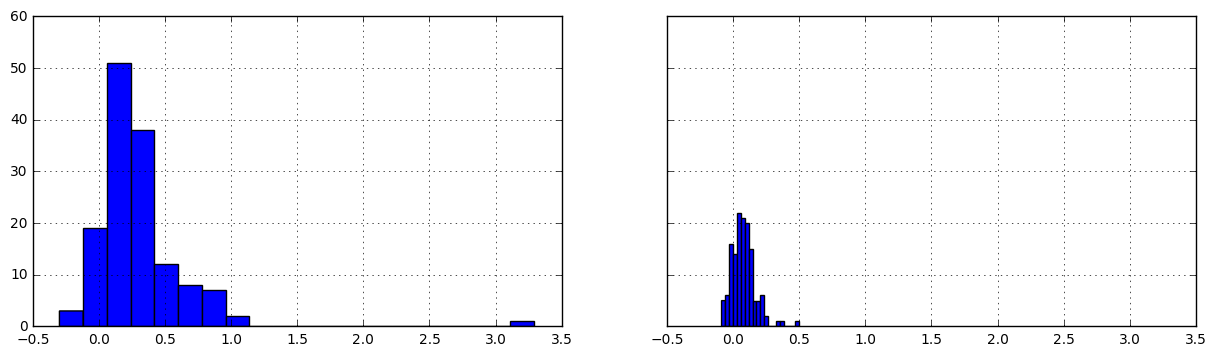

In [284]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,4))
df["Pending_Increase_%"].hist(bins=20, ax=ax1)
df["Complete_Increase_%"].hist(bins=20,ax=ax2)

R-squared 2014: nan
R-squared 2016: 0.770749874578


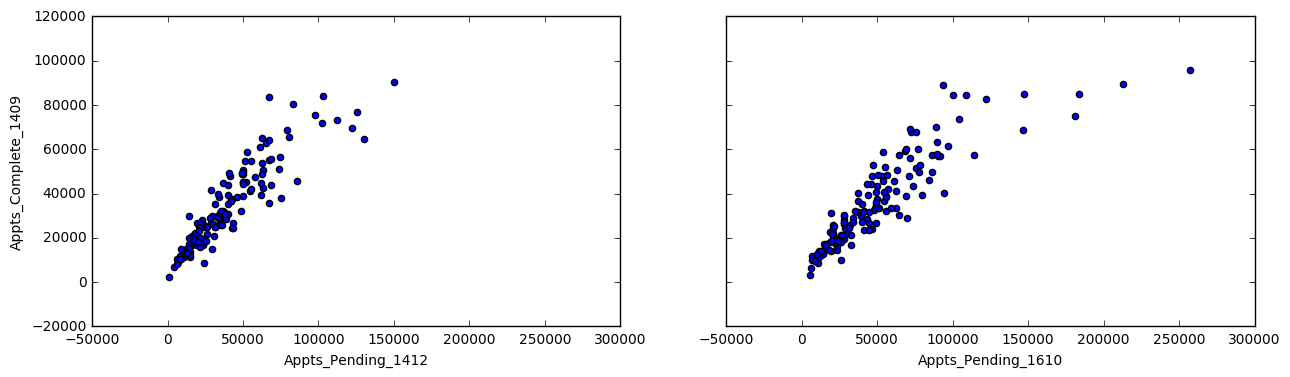

In [218]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(15,4))

df.plot(kind = 'scatter',x='Appts_Pending_1412', y='Appts_Complete_1409',ax=ax1)
df.plot(kind = 'scatter', x='Appts_Pending_1610', y='Appts_Complete_1608',ax=ax2)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1412"],df["Appts_Complete_1409"])
print "R-squared 2014: "+ str(r_value**2)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Complete_1608"])
print "R-squared 2016: "+ str(r_value**2)



### Thoughts

It appears like several outliers are really dragging pending upward. 

# Leadership

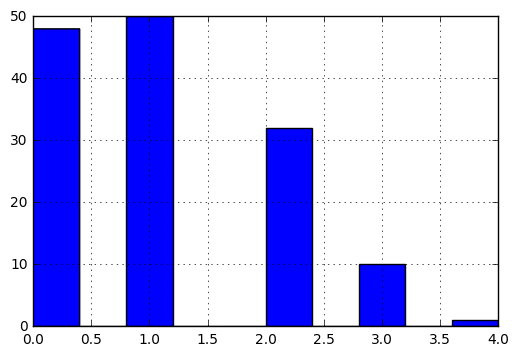

In [219]:
df["Missing_Leadership"].hist()

#### Thoughts
A majority of stations have at least one vacant or interim leadership position.

In [220]:
df["Missing_Leadership"].describe()

count    141.000000
mean       1.049645
std        0.958617
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Missing_Leadership, dtype: float64

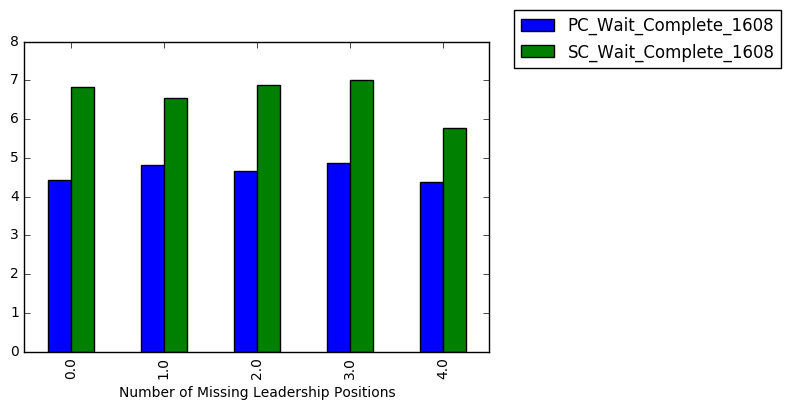

In [221]:
pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =['PC_Wait_Complete_1608','SC_Wait_Complete_1608'],aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

### Thoughts
Wait times appear to be unaffected by missing leadership.

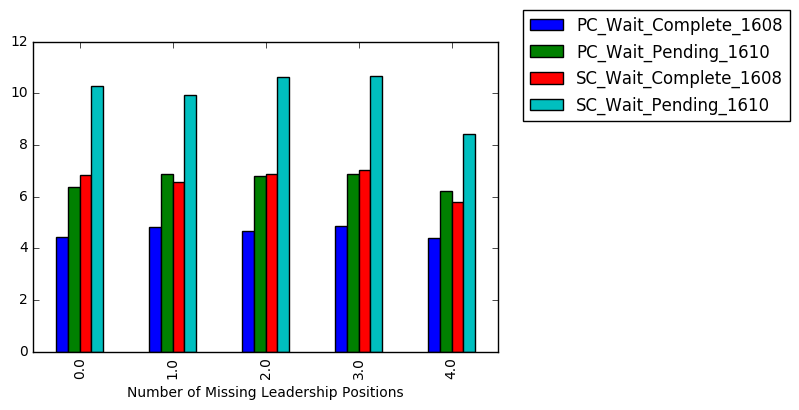

In [222]:
values = ['PC_Wait_Pending_1610','PC_Wait_Complete_1608','SC_Wait_Pending_1610','SC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

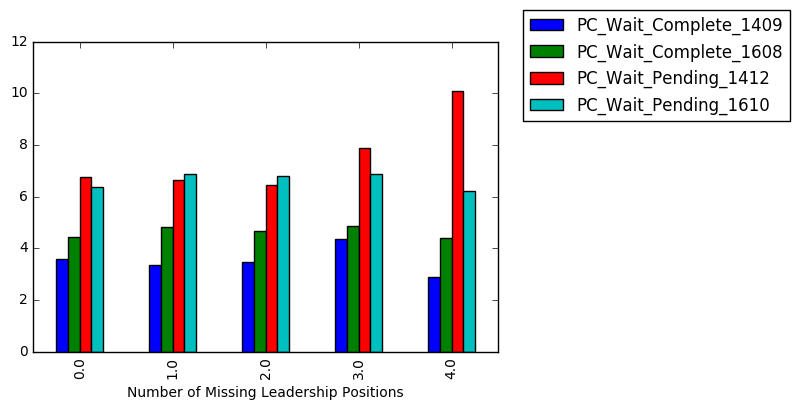

In [223]:
values = ['PC_Wait_Pending_1412','PC_Wait_Complete_1409','PC_Wait_Pending_1610','PC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

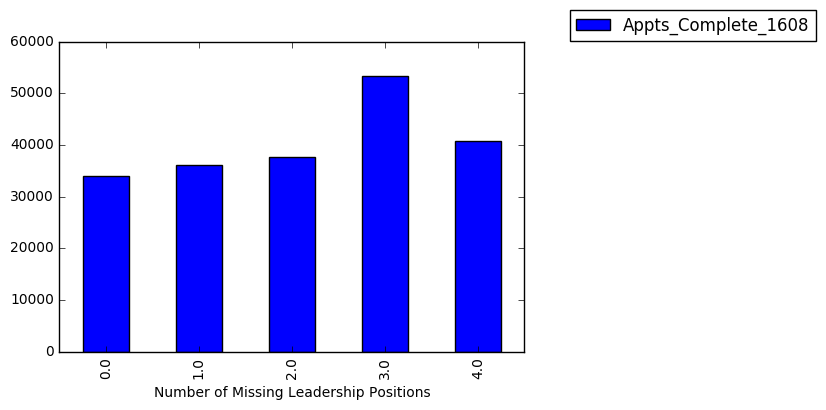

In [224]:
values = ['Appts_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

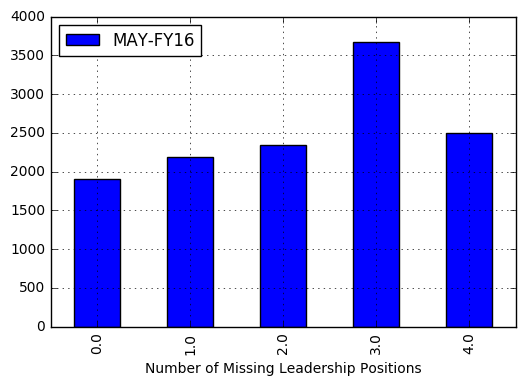

In [285]:
values = ["MAY-FY16"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)

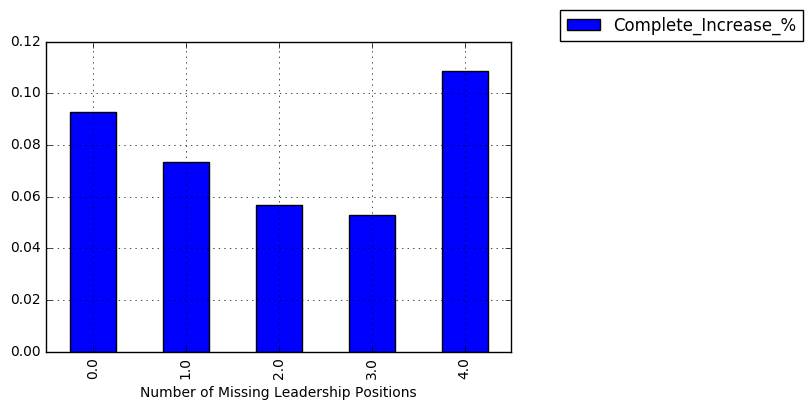

In [225]:
values = ["Complete_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)


plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

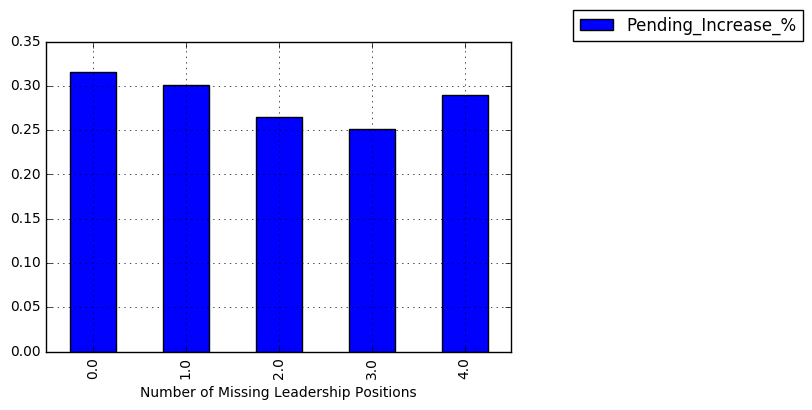

In [226]:
values = ["Pending_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)
plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

### Thoughts
While the raw numbers show more completed appointments, it appears that this is just because there are bigger stations. Missing leadership does appear to have an affect on the percent increase of completed appointments. Pending saw a similar affect. 

# Wait Times

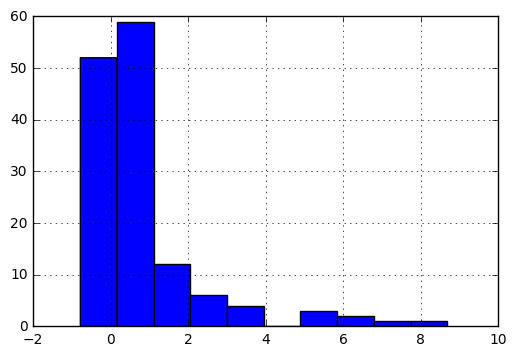

In [231]:
df["PC_Wait_Complete_Increase_%"].hist()

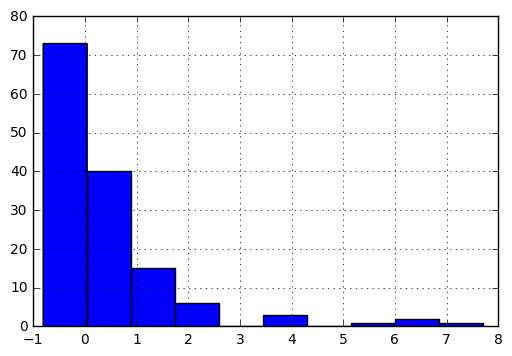

In [287]:
df["PC_Wait_Pending_Increase_%"].hist()

### Thoughts
While it looks like plenty of stations had reduced their weight time, many did not. And several outliers grew significantly worse. 

# Turnover

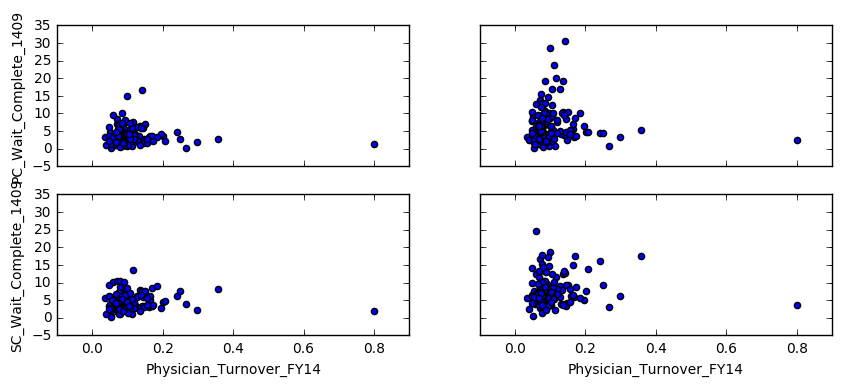

In [265]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(10,4))

df.plot(kind='scatter',y="PC_Wait_Complete_1409",x="Physician_Turnover_FY14", ax=ax1)
df.plot(kind='scatter',y="PC_Wait_Pending_1412",x="Physician_Turnover_FY14", ax=ax2)
df.plot(kind='scatter',y="SC_Wait_Complete_1409",x="Physician_Turnover_FY14", ax=ax3)
df.plot(kind='scatter',y="SC_Wait_Pending_1412",x="Physician_Turnover_FY14", ax=ax4)


In [235]:
df[df["Physician_Turnover_FY14"]>.6]

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Choice_Increase_%,PC_Wait_Pending_Increase,PC_Wait_Pending_Increase_%,PC_Wait_Complete_Increase,PC_Wait_Complete_Increase_%,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15
8,31376,3.16%,2.33,3.64,4.29,528al,(V02) (479) V2HCNALBANY NY,22.0,48.0,55.0,...,0.270833,3.39,1.454936,3.55,2.773438,NaN,NaN,NaN,0.8,NaN


In [247]:
df[df["Physician_Turnover_FY14"]>.6]["MAY-FY12"]

8    48.0
Name: MAY-FY12, dtype: float64

R-squared: nan


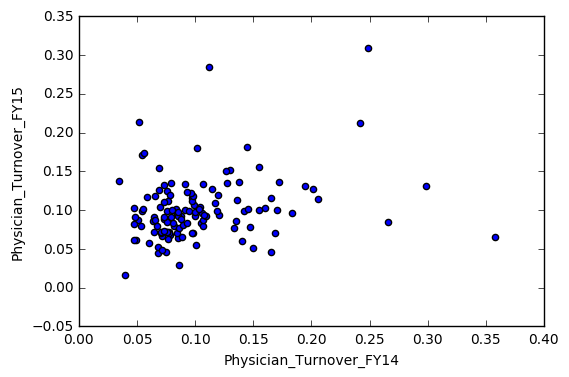

In [252]:
df.plot(kind='scatter',y="Physician_Turnover_FY15",x="Physician_Turnover_FY14")


slope, intercept, r_value, p_value, std_err = stats.linregress(df["Physician_Turnover_FY11"],df["Physician_Turnover_FY12"])
print "R-squared: "+ str(r_value**2)

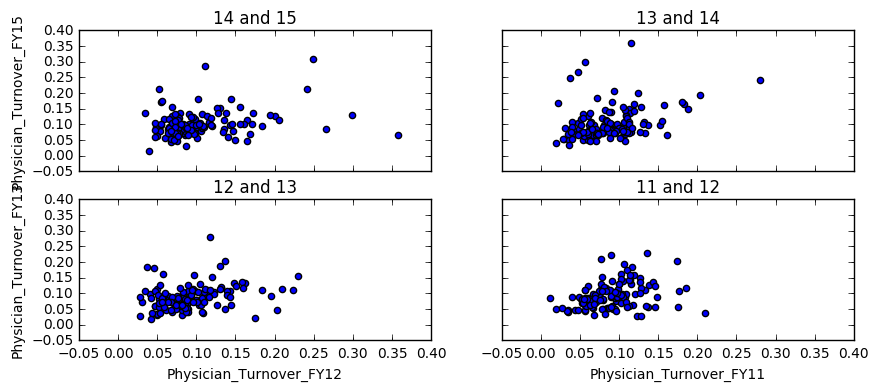

In [270]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(10,4))

df.plot(kind='scatter',y="Physician_Turnover_FY15",x="Physician_Turnover_FY14", ax=ax1)
ax1.set_title("14 and 15")
df.plot(kind='scatter',y="Physician_Turnover_FY14",x="Physician_Turnover_FY13", ax=ax2)
ax2.set_title("13 and 14")
df.plot(kind='scatter',y="Physician_Turnover_FY13",x="Physician_Turnover_FY12", ax=ax3)
ax3.set_title("12 and 13")
df.plot(kind='scatter',y="Physician_Turnover_FY12",x="Physician_Turnover_FY11", ax=ax4)
ax4.set_title("11 and 12")


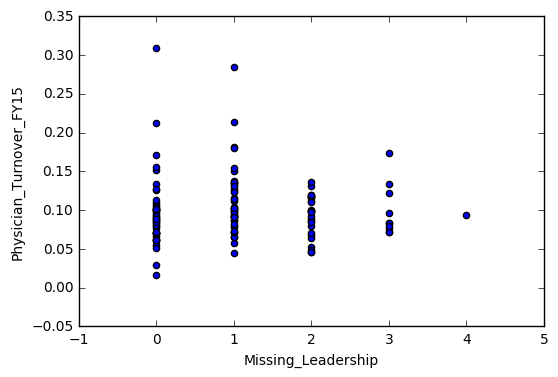

In [271]:
df.plot(kind='scatter',y="Physician_Turnover_FY15",x="Missing_Leadership")


In [276]:
Physician_Turnover_FY14

NameError: name 'Physician_Turnover_FY14' is not defined

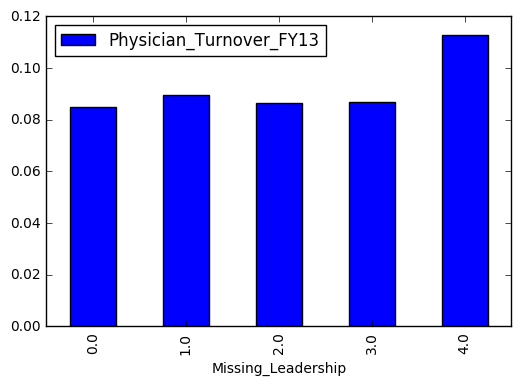

In [283]:
values = ['Physician_Turnover_FY13']
pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
pivot_Missing_Leadership.plot(kind="bar",x="Missing_Leadership")